In [11]:
from NeuralNetwork import Perceptron, ANN, Activation, Loss, train_test_val_split, create_mini_batches
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# innitialize the dataset for each gate

X_gate = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_gate = np.array([0, 0, 0, 1])
y_or_gate = np.array([0, 1, 1, 1])
y_xor_gate = np.array([0, 1, 1, 0])

In [13]:
# set up the perceptron

n_epochs = 10
learning_rate = 0.1

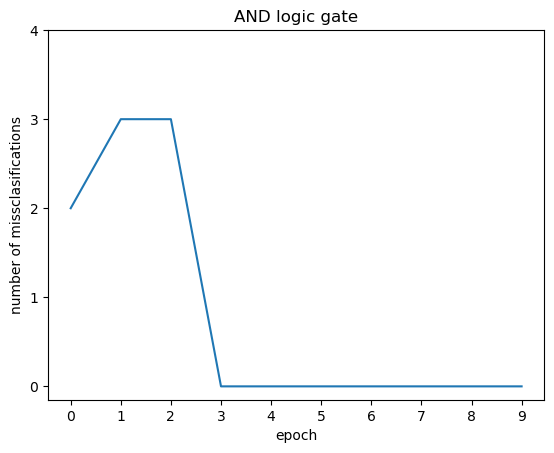

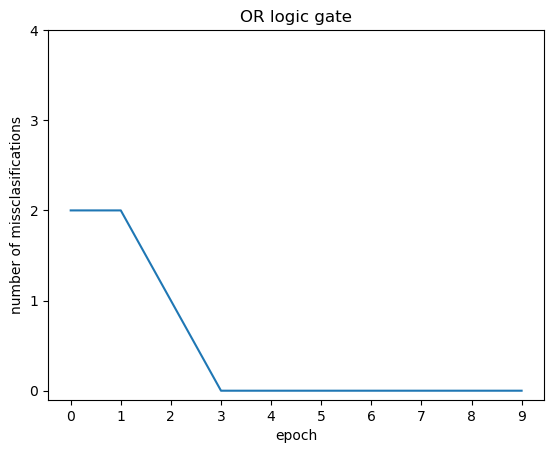

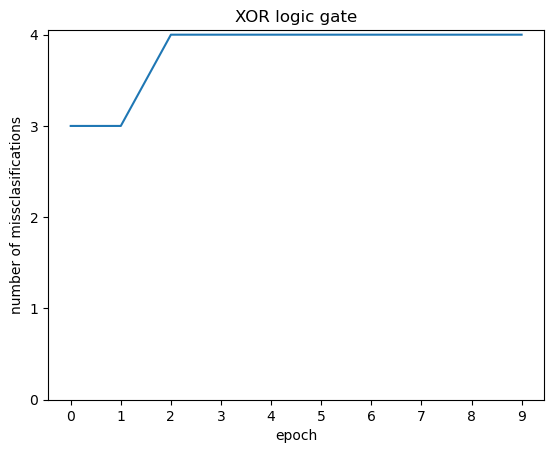

In [14]:
# THIS piece of code shows the error per epoch of the perceptron for each gate

for y_gate, title in zip([y_and_gate, y_or_gate, y_xor_gate], ["AND logic gate", "OR logic gate", "XOR logic gate"]):
    perceptron = Perceptron(learning_rate, n_epochs)
    gate_error = perceptron.train(X_gate, y_gate)
    plt.plot(gate_error)
    plt.xticks(np.arange(0, n_epochs, 1.0))
    plt.yticks(np.arange(0, 5, 1.0))
    plt.ylabel('number of missclasifications')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()

In [15]:
# testing softmax function
assert np.allclose(Activation().softmax(np.array([3.0, 1.0, 0.2])), np.array([0.8360188, 0.11314284, 0.05083836]))

assert np.allclose(Activation().softmax(np.array([[1, 2, 3], 
                                                  [2, 4, 8], 
                                                  [3, 5, 7],
                                                  [6, 6, 6]])), 
                                        np.array([[0.09003057, 0.24472847, 0.66524096],
                                                  [0.00242826, 0.01794253, 0.97962921],
                                                  [0.01587624, 0.11731043, 0.86681333],
                                                  [0.33333333, 0.33333333, 0.33333333]]))

In [16]:
features = pd.read_csv("../data/features.txt", sep = ',', header = None).to_numpy()
targets = pd.read_csv("../data/targets.txt", sep = ',', header = None).to_numpy()

In [17]:
x_train, x_test, x_val, y_train, y_test, y_val = train_test_val_split(features, targets, 0.6, 0.2)

In [18]:
print(features)

[[ 0.57855    0.82114    1.2148    ...  0.92471    0.24418    0.063001 ]
 [-0.022322   0.47681    0.55624   ...  1.0584     0.68453    0.99877  ]
 [ 0.057631   0.0017896  0.95442   ...  0.20707    0.40055    0.2335   ]
 ...
 [ 0.53833    0.16903    0.79056   ...  0.298      0.76012    1.2506   ]
 [ 0.73106    0.48718    0.64578   ...  0.78159    0.78677    0.48252  ]
 [ 1.1326     0.50078    0.93334   ...  0.58395    1.1942     0.61762  ]]


In [19]:
ann = ANN([10, 7], 1.0, [Activation(1.0, 0.1).LReLU, Activation().softmax], Loss().categorical_cross_entropy, number_of_features = 10)
for i in ann.weights:   print(i.shape)
ann.predict(features)

TypeError: __init__() missing 1 required positional argument: 'loss_function'

In [20]:
num_of_batches = 32

batches = create_mini_batches(x_train, y_train, num_of_batches)
print(batches)
print("Created: ", len(batches), " batches")
print(len(x_train) / num_of_batches)

[(array([[ 0.74657  ,  0.26931  ,  0.79392  ,  0.49964  ,  0.73248  ,
         0.78881  , -0.036295 ,  0.35217  ,  1.071    ,  0.84981  ],
       [ 0.81027  ,  0.54545  ,  0.81389  ,  0.49314  ,  0.76125  ,
         0.75246  ,  0.26565  ,  0.52731  ,  0.19213  ,  0.52508  ],
       [ 0.96726  , -0.048663 ,  0.78566  ,  0.14854  ,  0.35049  ,
         0.095679 ,  1.0984   ,  0.004484 ,  0.69233  ,  0.56233  ],
       [ 1.0307   , -0.11962  ,  1.0057   ,  0.44976  ,  0.25612  ,
         0.096169 ,  0.89989  ,  0.37367  ,  0.37776  ,  0.45972  ],
       [ 0.7024   ,  0.9181   ,  0.094438 ,  1.0696   ,  0.749    ,
         0.58509  ,  0.65956  ,  0.12324  ,  0.38116  ,  0.35336  ],
       [ 0.45524  ,  0.47959  ,  0.21175  , -0.067554 ,  0.87446  ,
         0.12854  ,  0.43512  ,  0.84087  ,  0.56424  ,  0.090374 ],
       [ 0.72603  ,  1.0611   ,  0.26466  ,  0.67193  ,  0.011303 ,
         0.8718   ,  0.0059945,  0.83333  ,  1.104    ,  0.010142 ],
       [ 0.21623  ,  0.86391  ,  0.2888

In [21]:
# Run feed_forward for the 1st data point
alphas, zetas = ann.feed_forward([features[0]])

NameError: name 'ann' is not defined

In [22]:
print(len(alphas), len(zetas))
print("Alphas:", alphas)
print("Zetas:", zetas)

NameError: name 'alphas' is not defined

In [23]:
bias_gradients = np.zeros(10).reshape(-1, 1)

In [24]:
print(bias_gradients)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [26]:
biases = [[1], [2], [3], [4], [5]]
bias_gradients2 = [np.zeros(bias.shape)
                          for bias in biases]
print(bias_gradients2)

AttributeError: 'list' object has no attribute 'shape'